In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn
from OneLayerFuncs import train_and_extract, plot_coeffs
from Utility import getFourierCoeffs

In [2]:
func1 = lambda x: 2.45*np.sin(np.pi*x) + np.sin(4*np.pi*x) + np.sin(7*np.pi*x)
func2 = lambda x: np.power(x,2)
x1 = np.linspace(-1,1,1000)
results_dict_1 = train_and_extract(x1, func1)
# results_dict_2 = train_and_extract(x1, func2);

Training ...:   0%|          | 0/350 [00:00<?, ?it/s]c:\Users\jaspe\Academics\senior-thesis\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training ...: 100%|██████████| 350/350 [00:21<00:00, 16.66it/s]


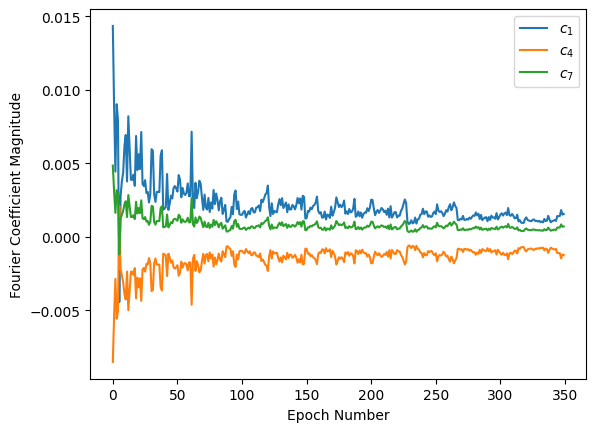

In [3]:
target_sin_coeffs = getFourierCoeffs(x1, func1, num=11)[0]
# Normalize the growth 
plot_coeffs([1,4,7], results_dict_1['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

Training ...: 100%|██████████| 350/350 [00:34<00:00, 10.07it/s]


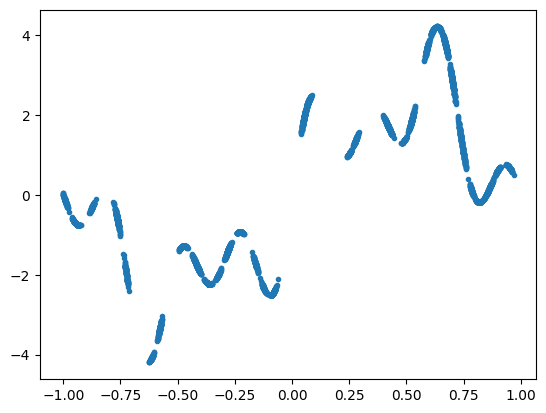

In [4]:
bogus_data = np.array([])
num_clusters = 56
x_min, x_max = -1,1
cluster_pts = (x_max-x_min)*np.random.uniform(size=num_clusters) + x_min
eps = 0.005
num_pts_per_cluster = 100
for cluster_pt in cluster_pts:
    pts = eps*np.random.randn(num_pts_per_cluster) + (cluster_pt)
    bogus_data = np.concatenate([bogus_data, pts])
plt.plot(bogus_data,func1(bogus_data),'.')
bogus_dict = train_and_extract(x1, func1, data=bogus_data, batch_size=num_pts_per_cluster, shuffle=False)

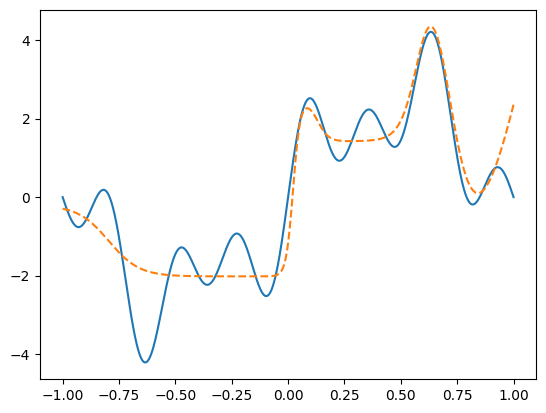

In [5]:
# Visualize how good the function fit was
model = bogus_dict['model']
YHat = model(torch.Tensor(x1).unsqueeze(-1)).detach().numpy()
plt.figure()
plt.plot(x1, func1(x1))
plt.plot(x1, YHat, '--')

[2.41385279 0.7184044  0.45828627]


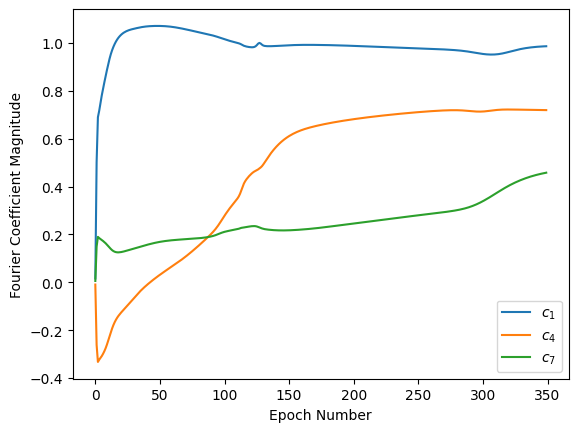

In [6]:
model_func = lambda x: model(torch.Tensor(x).unsqueeze(-1)).detach().numpy().flatten()
sl = slice(1,4,7)
print(np.array(getFourierCoeffs(x1, model_func, num=11)[0])[[0,3,6]])
target_sin_coeffs = getFourierCoeffs(x1, func1, num=11)[0]
plot_coeffs([1,4,7], bogus_dict['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

In [8]:
idx = [1,2,3,4,7]
plot_coeffs(idx, np.abs(results_dict_2['cos_coeffs_mat']))
print(np.abs(getFourierCoeffs(x1, func2)[1])[list(np.array(idx)-1)])

NameError: name 'results_dict_2' is not defined

In [ ]:
_, xsq_cos_coeffs = getFourierCoeffs(x1, func2)
print(np.round(xsq_cos_coeffs, 6))

# Interesting! For this following function: $f(x) = x^2 + 4x^3 + \sin(\pi x)$, the algorithm learns the different components at almost the same rates!

In [ ]:
func3 = lambda x: x**2 + 4*x**3 + np.sin(np.pi*x)
results_dict_3 = train_and_extract(x1, func3)

In [ ]:
model = results_dict_3['model']
YHat = model(torch.Tensor(x1).unsqueeze(-1)).detach().numpy()
plt.figure()
plt.plot(x1, func3(x1))
plt.plot(x1, YHat, '--')

In [ ]:
fun3_sin_coeffs, fun3_cos_coeffs = getFourierCoeffs(x1, func3)
idx = [1,2,4,9]
target_coeffs = np.array(fun3_sin_coeffs)[np.array(idx)-1]
plot_coeffs(idx, np.abs(results_dict_3['sin_coeffs_mat']), target_coeffs=target_coeffs)

# Just to make sure that the ability of the neural network to pick things up doesn't depend on the largest component being $\sin(\pi x)$

Training ...: 100%|███████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.15it/s]


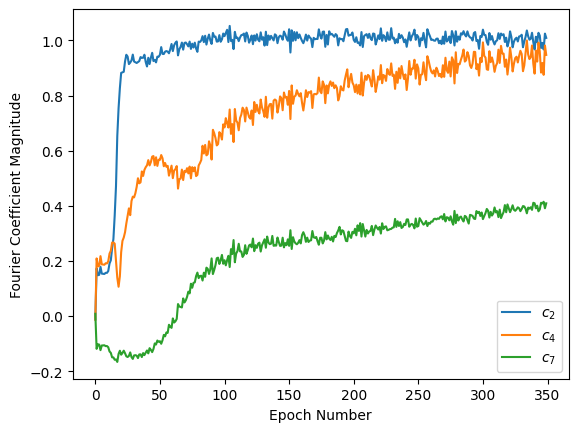

In [11]:
func1_alt = lambda x: 2.45*np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + np.sin(7*np.pi*x)
results_dict_1_alt = train_and_extract(x1, func1_alt)
target_sin_coeffs = getFourierCoeffs(x1, func1_alt, num=11)[0]
# Normalize the growth 
plot_coeffs([2,4,7], results_dict_1_alt['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

Training ...: 100%|███████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.29it/s]


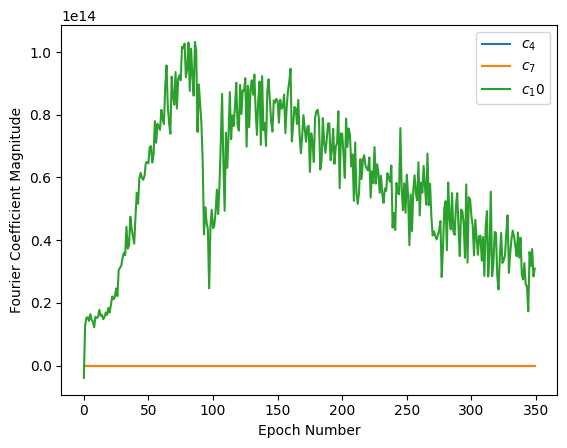

In [6]:
func1_higher = lambda x: 2.56*np.sin(4*np.pi*x) + np.sin(7*np.pi*x) + np.sin(11*np.pi*x)
results_dict_higher = train_and_extract(x1, func1_higher)
target_sin_coeffs = getFourierCoeffs(x1, func1_higher, num=14)[0]
plot_coeffs([4,7,10], results_dict_higher['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

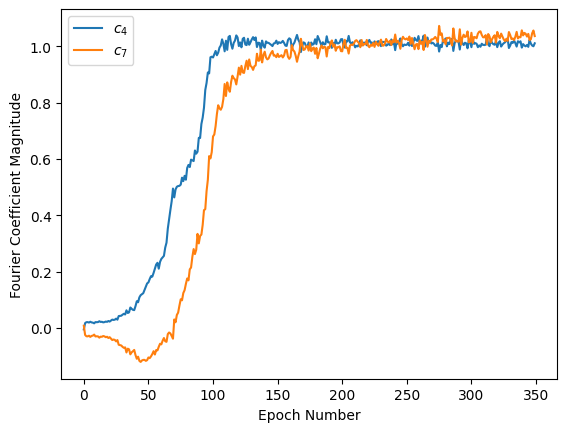

In [10]:
target_sin_coeffs = getFourierCoeffs(x1, func1_higher, num=14)[0]
plot_coeffs([4,7], results_dict_higher['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

Training ...: 100%|███████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.49it/s]


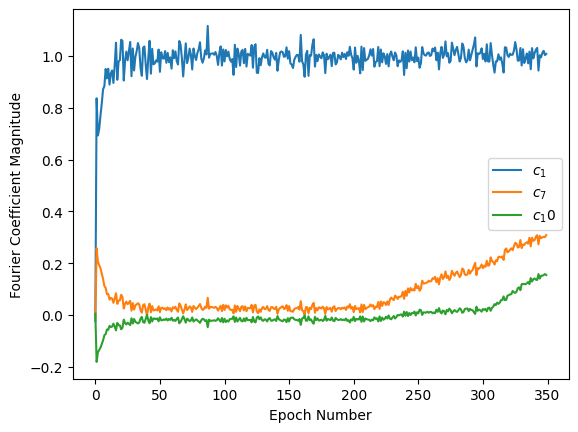

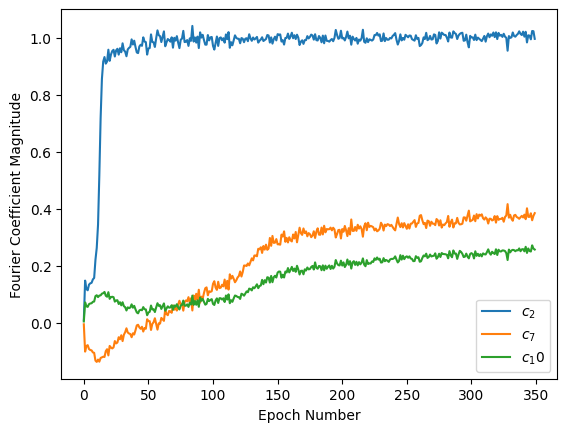

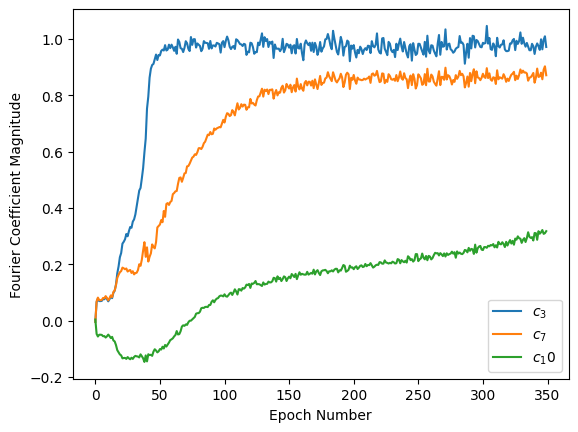

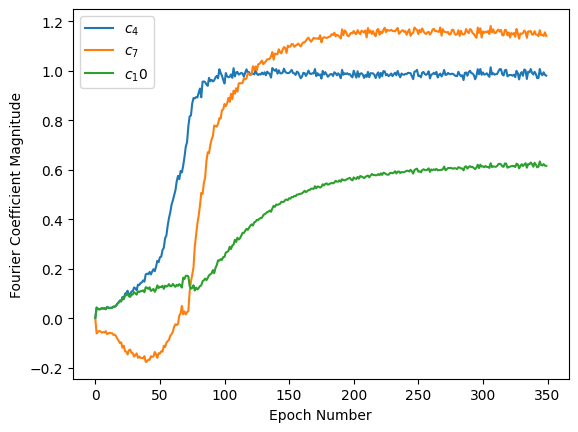

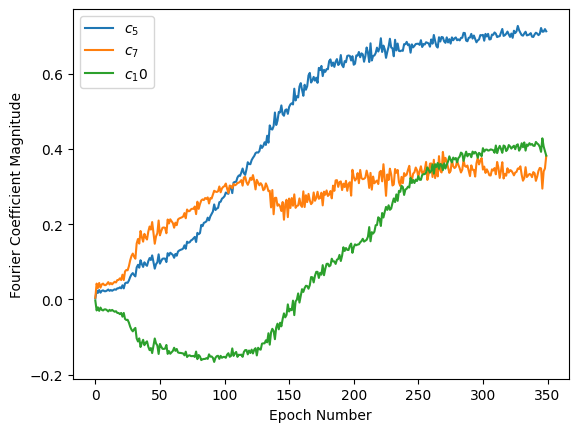

In [13]:
for i in range(1,6):
    f = lambda x: 2.45*np.sin(i*np.pi*x) + np.sin(7*np.pi*x) + np.sin(10*np.pi*x)
    results = train_and_extract(x1, f)
    target_sin_coeffs = getFourierCoeffs(x1, f, num=13)[0]
    # Normalize the growth 
    plot_coeffs([i,7,10], results['sin_coeffs_mat'], target_coeffs=target_sin_coeffs, normalize=True)

In [73]:
# Verifying analytic formula for fourier sine coefficients
def calc_integral(x,nu,c,w,b):
    x_diff = np.max(x) - np.min(x)
    num_params = len(c)
    coeff_nu = 0
    
    for i in range(num_params):
        integral = np.sum(np.sin(nu*np.pi*x) / (1 + np.exp(-(w[i]*x+b[i])))) * x_diff/len(x)
        coeff_nu += c[i] * integral
    return coeff_nu

model = results_dict_1['model']
func1_hat = lambda x: model(torch.Tensor(x).unsqueeze(-1)).detach().numpy().flatten()
model_sin_coeffs = getFourierCoeffs(x1, func1_hat, num=10)[0]
w = list(model.parameters())[0].detach().numpy()
b = list(model.parameters())[1].detach().numpy()
c = list(model.parameters())[2][0].detach().numpy()
mode_num = 1
print(calc_integral(np.linspace(-1,1,5000), mode_num, c, w, b))
print(model_sin_coeffs[mode_num-1])

2.4385823956013866
2.4366299605545003
